### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#Colores a usar
colores_categorias = ["palevioletred", "darkturquoise", "plum", "khaki"]

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Suma Ingresos Totales por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()


In [ ]:
# Imprime los Ingresos
print("Ingresos Totales de cada Tienda")
print("-"*30)
print(f"Ingreso Tienda 1: {ingreso_tienda1}")
print("-"*30)
print(f"Ingreso Tienda 2: {ingreso_tienda2}")
print("-"*30)
print(f"Ingreso Tienda 3: {ingreso_tienda3}")
print("-"*30)
print(f"Ingreso Tienda 4: {ingreso_tienda4}")
print("-"*30)

Ingresos Totales de cada Tienda
------------------------------
Ingreso Tienda 1: 1150880400.0
------------------------------
Ingreso Tienda 2: 1116343500.0
------------------------------
Ingreso Tienda 3: 1098019600.0
------------------------------
Ingreso Tienda 4: 1038375700.0
------------------------------


In [ ]:
#Guardamos los Ingresos Totales
resumen_ingresos = pd.Series({
    "Tienda 1": ingreso_tienda1,
    "Tienda 2": ingreso_tienda2,
    "Tienda 3": ingreso_tienda3,
    "Tienda 4": ingreso_tienda4
})

resumen_ingresos.name = "Ingresos Totales"

Nota: El eje X del gráfico de ingresos comienza en 1,000,000,000.


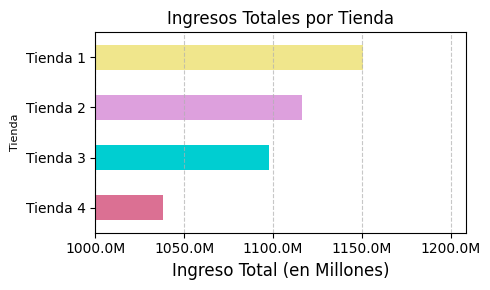

In [ ]:
#Graficamos
resumen_ingresos_ordenado = resumen_ingresos.sort_values(ascending=True)
plt.figure(figsize=(5, 3))
resumen_ingresos_ordenado.plot(kind='barh', color=colores_categorias)

# etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=12)
plt.ylabel('Tienda', fontsize=8)
ax = plt.gca()

#Comparar mejor
custom_xlim_min = 1000000000
ax.set_xlim(left=custom_xlim_min)
print(f"Nota: El eje X del gráfico de ingresos comienza en {custom_xlim_min:,.0f}.")


#Formato
ax.ticklabel_format(style='plain', axis='x')
max_value = resumen_ingresos_ordenado.max()
current_xlabel = 'Ingreso Total'
if max_value >= 1e6:  # If max value is 1 million or more, use "M"
    def millions_formatter(x, pos):
        'The pos argument is required, but not always used'
        if x == 0: return '0'
        return f'{x / 1e6:.1f}M'
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
    current_xlabel = 'Ingreso Total (en Millones)'
elif max_value >= 1e3:  # If max value is 1 thousand or more (but less than 1M), use "K"
    def thousands_formatter(x, pos):
        if x == 0: return '0'
        return f'{x / 1e3:.0f}K'
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))
    current_xlabel = 'Ingreso Total (en Miles)'


plt.xlabel(current_xlabel, fontsize=12) # Set the determined x-axis label

# --- End of New Formatting ---

plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría


--- Análisis para: Tienda 1 ---
----------------------------
Ventas por Categoría Completas - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
------------------------------


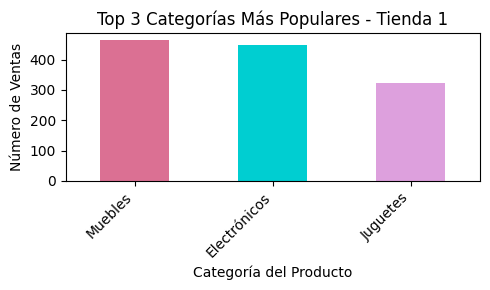



--- Análisis para: Tienda 2 ---
----------------------------
Ventas por Categoría Completas - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
------------------------------


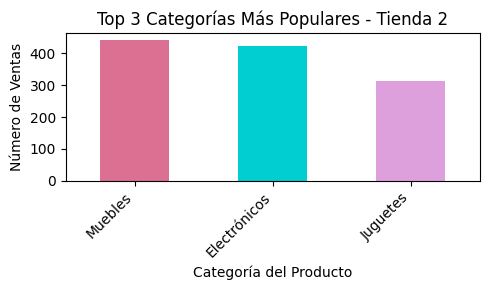



--- Análisis para: Tienda 3 ---
----------------------------
Ventas por Categoría Completas - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
------------------------------


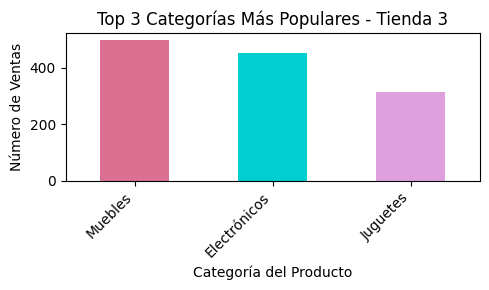



--- Análisis para: Tienda 4 ---
----------------------------
Ventas por Categoría Completas - Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64
------------------------------


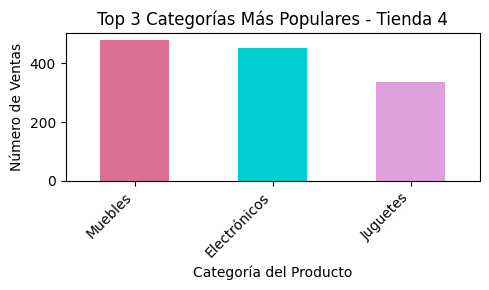

In [ ]:
# Nombre de la columna de categorías
columna_categorias = "Categoría del Producto"

#Categorias a mostrar en el grafico
top_n = 3

#Lista iterable
lista_tiendas_info = [
    (tienda, "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4")
]


# Iterar sobre cada tienda para procesar, imprimir y luego graficar
for df_actual, nombre_tienda_actual in lista_tiendas_info:
    print(f"\n--- Análisis para: {nombre_tienda_actual} ---")
    print("-" * (20 + len(nombre_tienda_actual)))

    ventas_por_categoria_actual = df_actual[columna_categorias].value_counts()

    # Imprimir todas las ventas por categoría para la tienda actual
    print(f"Ventas por Categoría Completas - {nombre_tienda_actual}:")
    print(ventas_por_categoria_actual)
    print("-" * 30)

    # --- Graficar el TOP N de categorías para la tienda actual ---
    top_categorias_actual = ventas_por_categoria_actual.head(top_n)

    if not top_categorias_actual.empty:
        # Mantener los graficos independientes
        plt.figure(figsize=(5, 3))
        top_categorias_actual.plot(kind='bar', color=colores_categorias)
        plt.title(f'Top {top_n} Categorías Más Populares - {nombre_tienda_actual}')
        plt.xlabel('Categoría del Producto')
        plt.ylabel('Número de Ventas')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show() # Mostrar el gráfico para esta tienda
    else:
        print(f"No hay datos de categorías para graficar el top {top_n} en {nombre_tienda_actual}.")

    print("\n" + "="*50)


# 3. Calificación promedio de la tienda


In [ ]:
#Hacemos el promedio
promedio_calificacion_tienda1 = tienda['Calificación'].mean()
promedio_calificacion_tienda2 = tienda2['Calificación'].mean()
promedio_calificacion_tienda3 = tienda3['Calificación'].mean()
promedio_calificacion_tienda4 = tienda4['Calificación'].mean()

print(f"Promedio Calificación Tienda 1: {promedio_calificacion_tienda1:.2f}")
print(f"Promedio Calificación Tienda 2: {promedio_calificacion_tienda2:.2f}")
print(f"Promedio Calificación Tienda 3: {promedio_calificacion_tienda3:.2f}")
print(f"Promedio Calificación Tienda 4: {promedio_calificacion_tienda4:.2f}")



Promedio Calificación Tienda 1: 3.98
Promedio Calificación Tienda 2: 4.04
Promedio Calificación Tienda 3: 4.05
Promedio Calificación Tienda 4: 4.00


Text(0, 0.5, 'Calificación Promedio')

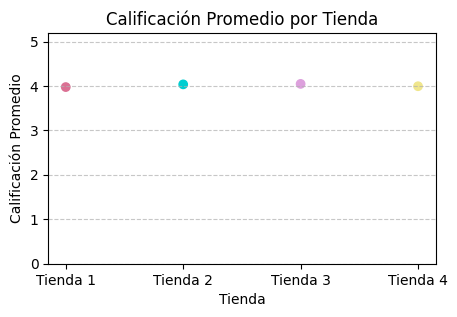

In [ ]:
# Graficos

tienda_nombres = [
    "Tienda 1",
    "Tienda 2",
    "Tienda 3",
    "Tienda 4"
]

calificaciones_promedio = [
    promedio_calificacion_tienda1,
    promedio_calificacion_tienda2,
    promedio_calificacion_tienda3,
    promedio_calificacion_tienda4
]


plt.figure(figsize=(5, 3))
plt.ylim(0, 5.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.scatter(tienda_nombres, calificaciones_promedio, color=colores_categorias)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

# 4. Productos más y menos vendidos



========== Análisis para: Tienda 1 ==========

--- Cantidad de productos vendidos para Tienda 1 ---
Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit d

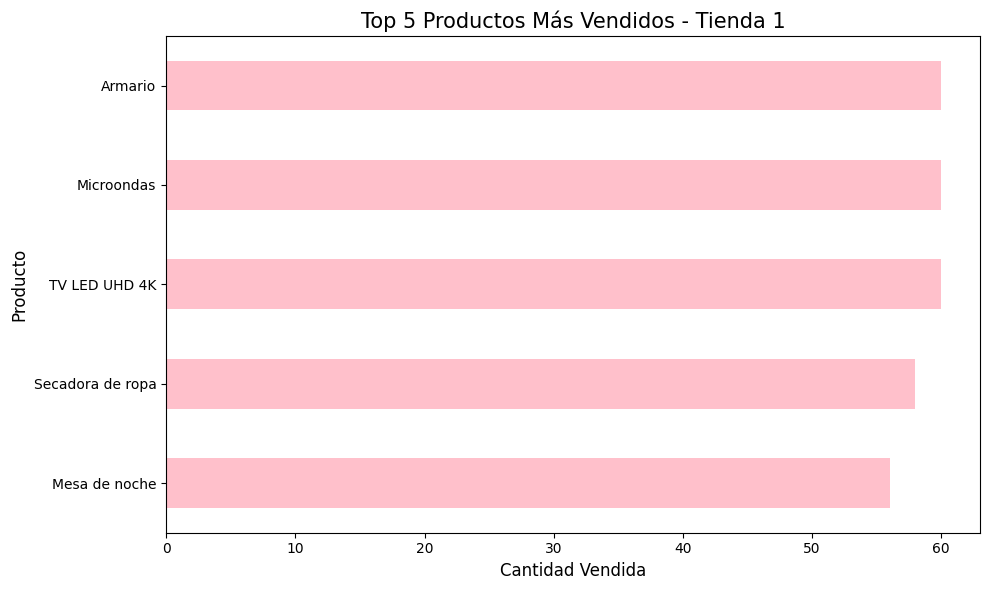

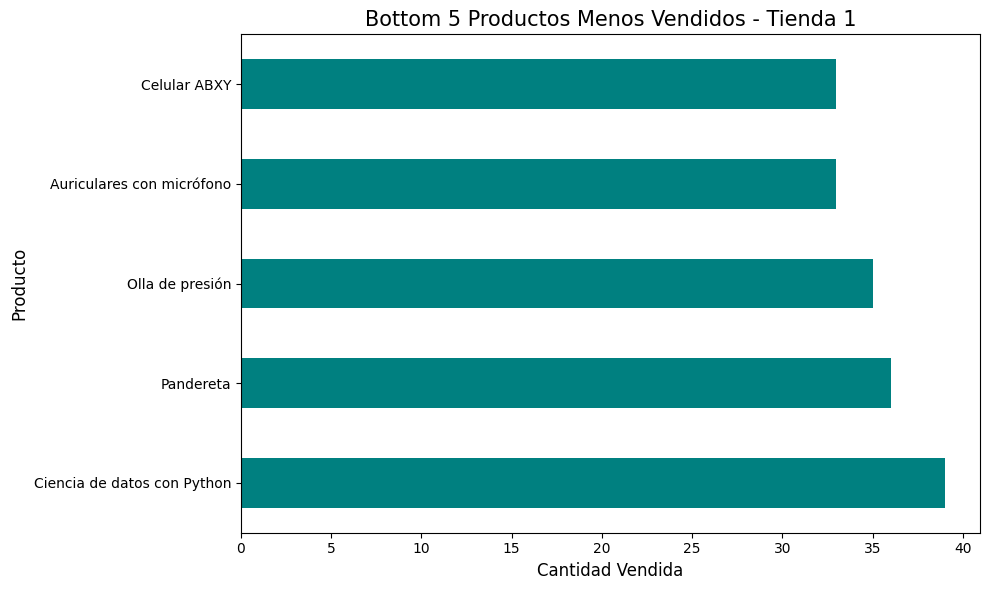



========== Análisis para: Tienda 2 ==========

--- Cantidad de productos vendidos para Tienda 2 ---
Producto
Iniciando en programación      65
Microondas                     62
Batería                        61
Guitarra acústica              58
Pandereta                      58
Secadora de ropa               57
Iphone 15                      55
Bloques de construcción        54
Armario                        54
Set de ollas                   52
Cuerda para saltar             50
Lavadora de ropa               49
Silla de oficina               49
Refrigerador                   49
Muñeca bebé                    48
Carrito de control remoto      47
Guitarra eléctrica             47
Cama box                       47
Vaso térmico                   47
Modelado predictivo            46
Balón de voleibol              46
Set de vasos                   46
Lavavajillas                   46
Kit de bancas                  45
Cama king                      45
Bicicleta                      45
Mochi

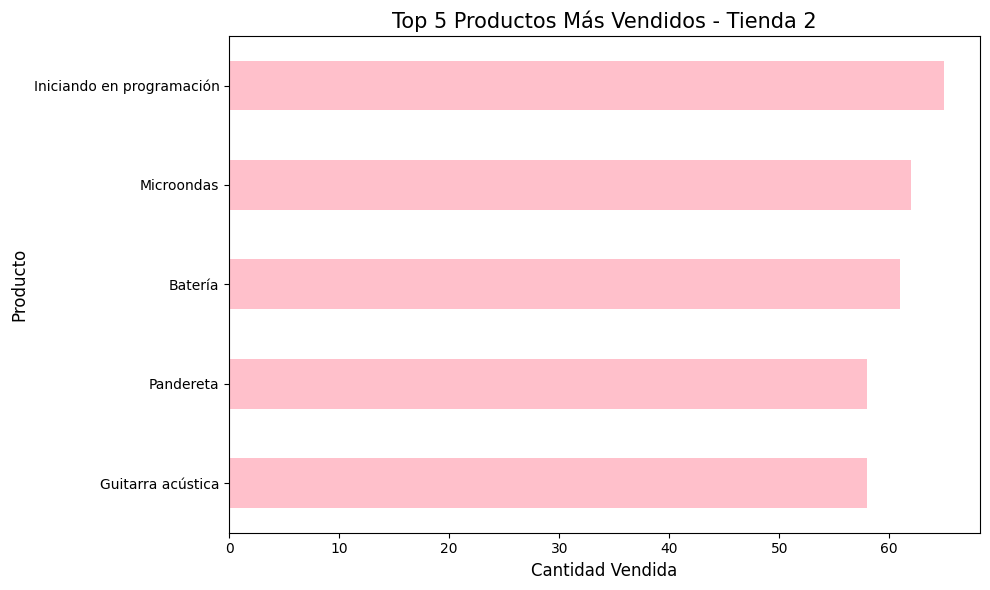

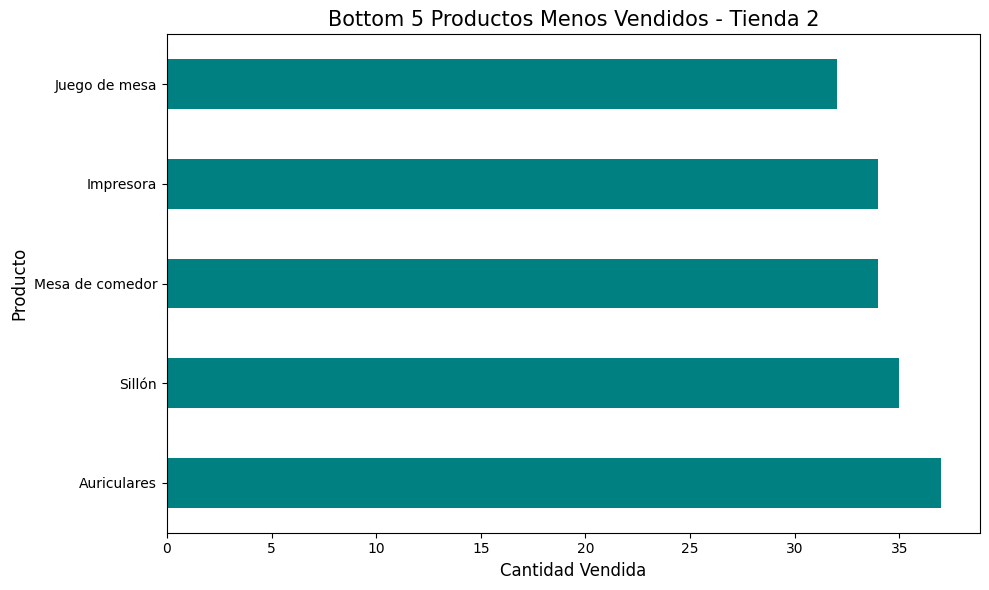



========== Análisis para: Tienda 3 ==========

--- Cantidad de productos vendidos para Tienda 3 ---
Producto
Kit de bancas                  57
Mesa de comedor                56
Cama king                      56
Set de ollas                   55
Mesa de noche                  55
Smart TV                       54
Estufa                         53
Cuerda para saltar             53
Modelado predictivo            53
Carrito de control remoto      52
Lavavajillas                   52
Bicicleta                      52
Juego de mesa                  52
Pandereta                      51
Impresora                      50
Refrigerador                   50
Balón de baloncesto            50
Armario                        49
Balón de voleibol              48
Tablet ABXY                    48
Sillón                         47
Guitarra acústica              47
Olla de presión                47
Ajedrez de madera              47
Ciencia de datos con Python    46
Iphone 15                      46
Dinos

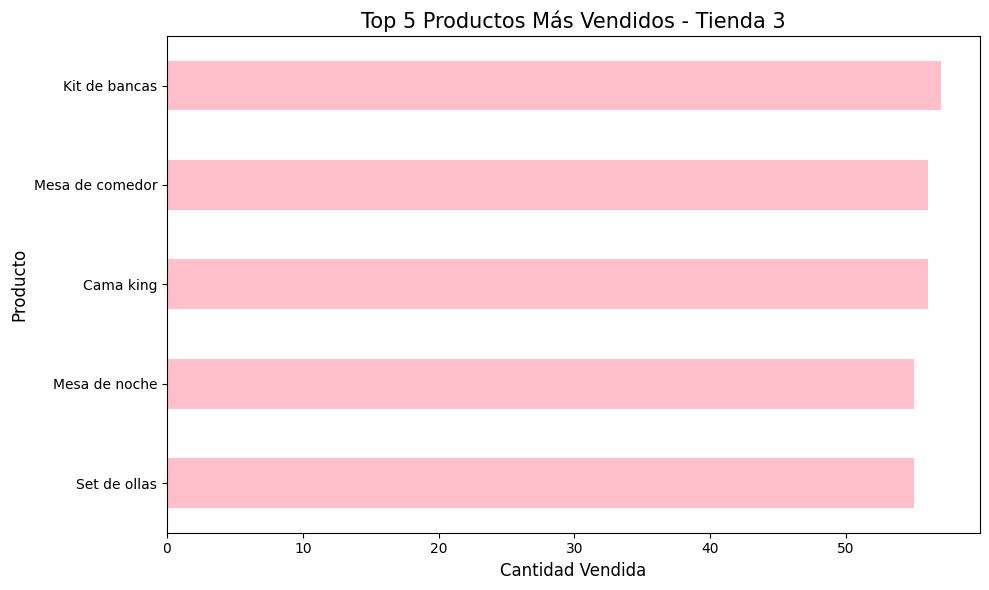

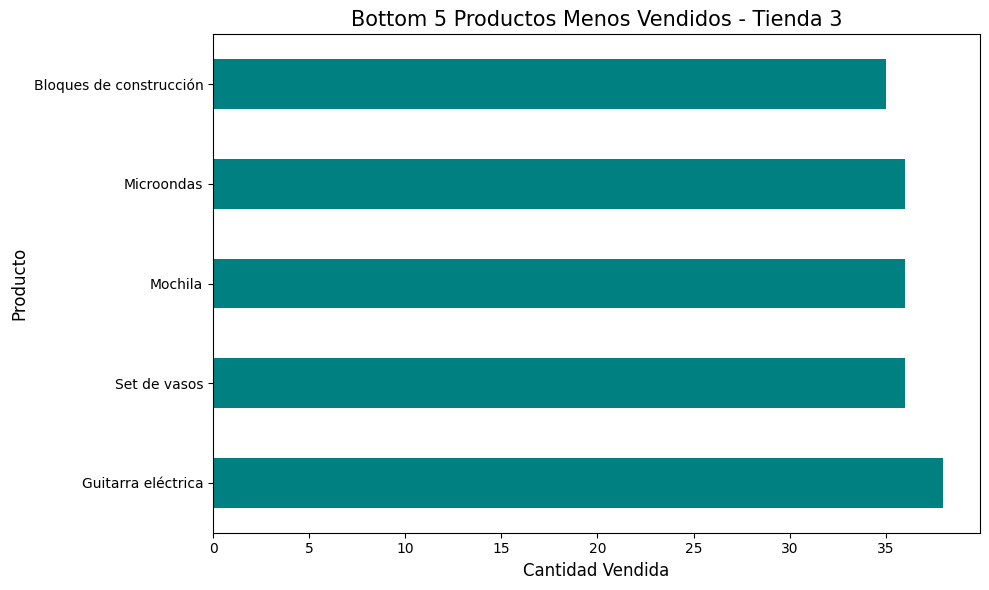



========== Análisis para: Tienda 4 ==========

--- Cantidad de productos vendidos para Tienda 4 ---
Producto
Cama box                       62
Cubertería                     59
Dashboards con Power BI        56
Cama king                      56
Carrito de control remoto      55
Mesa de comedor                55
Mesa de noche                  55
Smart TV                       54
Bloques de construcción        54
Pandereta                      52
Impresora                      50
Modelado predictivo            50
Asistente virtual              50
Set de ollas                   50
Balón de baloncesto            50
Vaso térmico                   48
Iphone 15                      48
Muñeca bebé                    48
Batería                        48
Balón de voleibol              48
Juego de mesa                  48
Microondas                     48
Estufa                         47
Cubo mágico 8x8                47
Sofá reclinable                47
Dinosaurio Rex                 47
Olla 

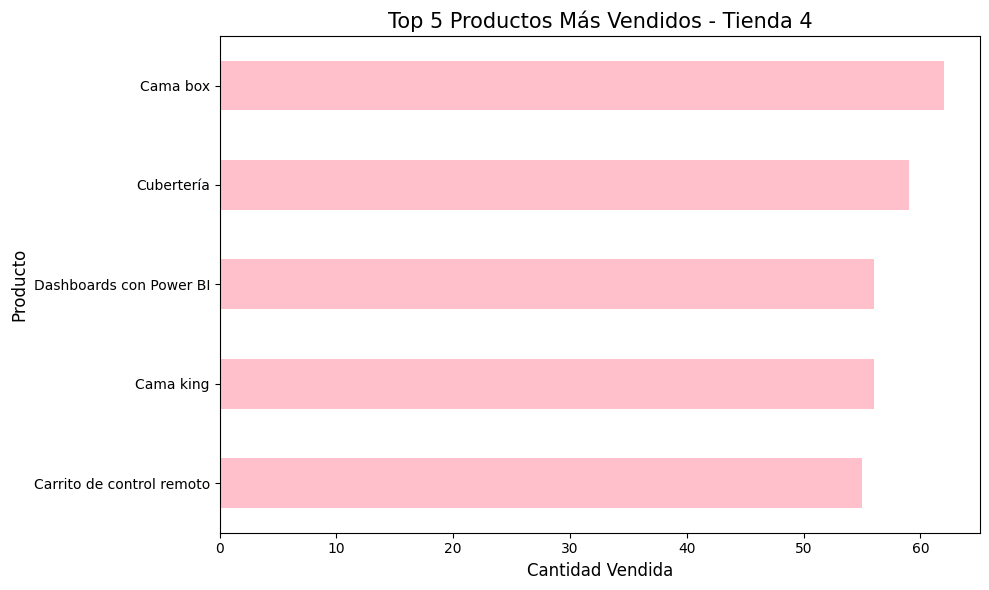

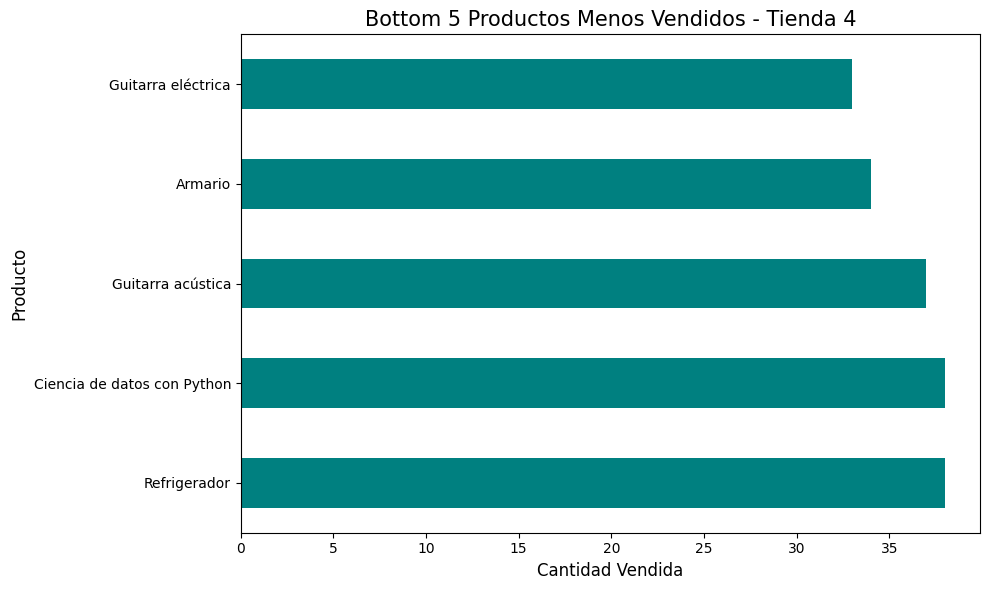

In [ ]:
columna_producto = "Producto"
n_top_bottom = 5

for df_tienda_actual, nombre_tienda_actual in lista_tiendas_info:
    print(f"\n\n{'='*10} Análisis para: {nombre_tienda_actual} {'='*10}")
    cantidad_productos_vendidos_actual = df_tienda_actual[columna_producto].value_counts()

    print(f"\n--- Cantidad de productos vendidos para {nombre_tienda_actual} ---")
    print(cantidad_productos_vendidos_actual)
    print("-" * 40)

    num_a_mostrar_top = min(n_top_bottom, len(cantidad_productos_vendidos_actual))
    print(f"\n--- Los {num_a_mostrar_top} Productos Más Vendidos en {nombre_tienda_actual} ---")
    print(cantidad_productos_vendidos_actual.head(num_a_mostrar_top))
    print("-" * 40)

    num_a_mostrar_bottom = min(n_top_bottom, len(cantidad_productos_vendidos_actual))
    print(f"\n--- Los {num_a_mostrar_bottom} Productos Menos Vendidos en {nombre_tienda_actual} ---")

    print(cantidad_productos_vendidos_actual.tail(num_a_mostrar_bottom))
    print("-" * 40)


    if cantidad_productos_vendidos_actual.empty:
        print(f"No se encontraron productos vendidos en {nombre_tienda_actual}.")
        continue # Salta al siguiente ítem del bucle

    # --- TOP N Productos
    num_top = min(n_top_bottom, len(cantidad_productos_vendidos_actual))

     # --- GRÁFICO PARA TOP N PRODUCTOS ---
    num_top_grafico = min(n_top_bottom, len(cantidad_productos_vendidos_actual))
    if num_top_grafico > 0:
        # Definir top_n_productos AQUÍ
        top_n_productos_para_grafico = cantidad_productos_vendidos_actual.head(num_top_grafico)

        plt.figure(figsize=(10, 6))
        # Para que el MÁS vendido (barra más larga) quede ARRIBA en barh,
        # la Series debe estar ordenada ASCENDENTE por valor antes de plotear.
        top_n_productos_para_grafico.sort_values(ascending=True).plot(kind='barh', color='pink')
        plt.title(f'Top {num_top_grafico} Productos Más Vendidos - {nombre_tienda_actual}', fontsize=15)
        plt.xlabel('Cantidad Vendida', fontsize=12)
        plt.ylabel('Producto', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay suficientes productos para graficar el top en {nombre_tienda_actual}.")

    # --- GRÁFICO PARA BOTTOM N PRODUCTOS ---
    num_bottom_grafico = min(n_top_bottom, len(cantidad_productos_vendidos_actual))
    if num_bottom_grafico > 0:
        # Definir bottom_n_productos AQUÍ
        bottom_n_productos_para_grafico = cantidad_productos_vendidos_actual.tail(num_bottom_grafico)

        plt.figure(figsize=(10, 6))
        # Para que el MENOS vendido (barra más corta) de este grupo quede ARRIBA en barh,
        # la Series debe estar ordenada ASCENDENTE por valor antes de plotear (el más pequeño primero en la serie -> abajo en barh)
        # O DESCENDENTE si quieres que el más pequeño (menos vendido) sea el último en la serie -> arriba en barh
        bottom_n_productos_para_grafico.sort_values(ascending=False).plot(kind='barh', color='teal')
        plt.title(f'Bottom {num_bottom_grafico} Productos Menos Vendidos - {nombre_tienda_actual}', fontsize=15)
        plt.xlabel('Cantidad Vendida', fontsize=12)
        plt.ylabel('Producto', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay suficientes productos para graficar el bottom en {nombre_tienda_actual}.")


# 5. Envío promedio por tienda

In [ ]:
coste_envio = tienda['Costo de envío'].mean()
coste_envio2 = tienda2['Costo de envío'].mean()
coste_envio3 = tienda3['Costo de envío'].mean()
coste_envio4 = tienda4['Costo de envío'].mean()

print(f"Costo de Envío Promedio Tienda 1: {coste_envio:.2f}")
print(f"Costo de Envío Promedio Tienda 2: {coste_envio2:.2f}")
print(f"Costo de Envío Promedio Tienda 3: {coste_envio3:.2f}")
print(f"Costo de Envío Promedio Tienda 4: {coste_envio4:.2f}")

Costo de Envío Promedio Tienda 1: 26018.61
Costo de Envío Promedio Tienda 2: 25216.24
Costo de Envío Promedio Tienda 3: 24805.68
Costo de Envío Promedio Tienda 4: 23459.46


In [ ]:
# Costo Envio Total Por tienda

coste_envio_total = tienda['Costo de envío'].sum()
coste_envio_total2 = tienda2['Costo de envío'].sum()
coste_envio_total3 = tienda3['Costo de envío'].sum()
coste_envio_total4 = tienda4['Costo de envío'].sum()

print(f"Costo de Envío Total Tienda 1: {coste_envio_total:.2f}")
print(f"Costo de Envío Total Tienda 2: {coste_envio_total2:.2f}")
print(f"Costo de Envío Total Tienda 3: {coste_envio_total3:.2f}")
print(f"Costo de Envío Total Tienda 4: {coste_envio_total4:.2f}")

resumen_envio_total = pd.Series({
    "Tienda 1": coste_envio_total,
    "Tienda 2": coste_envio_total2,
    "Tienda 3": coste_envio_total3,
    "Tienda 4": coste_envio_total4
})

Costo de Envío Total Tienda 1: 61377900.00
Costo de Envío Total Tienda 2: 59485100.00
Costo de Envío Total Tienda 3: 58516600.00
Costo de Envío Total Tienda 4: 55317400.00


# EXTRA: Ingreso Neto por Tienda


In [ ]:
ingreso_neto_tiendas = resumen_ingresos - resumen_envio_total
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
ingreso_neto_tiendas.name = "Ingreso Neto"
print(ingreso_neto_tiendas)


Tienda 1   1089502500.00
Tienda 2   1056858400.00
Tienda 3   1039503000.00
Tienda 4    983058300.00
Name: Ingreso Neto, dtype: float64


# EXTRA: Comparacion Ingresos

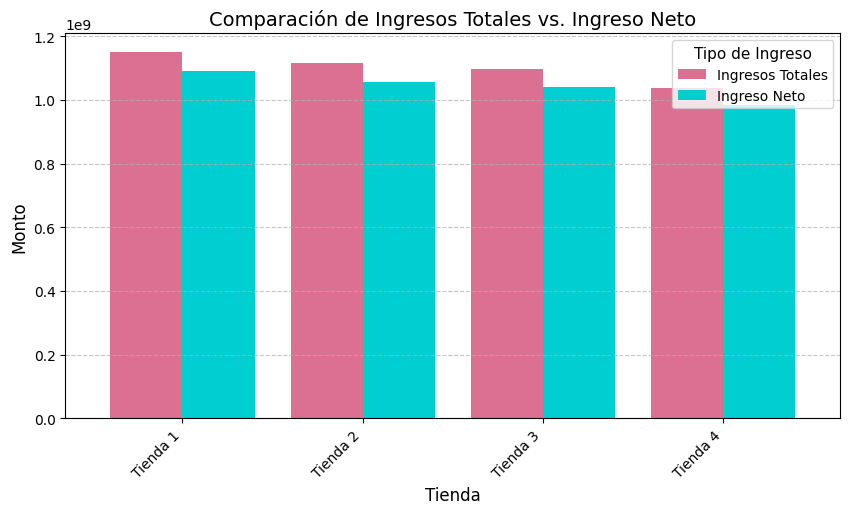

In [ ]:
df_para_graficar = pd.concat([resumen_ingresos, ingreso_neto_tiendas], axis=1)
ax = df_para_graficar.plot(kind='bar', figsize=(10, 5), width=0.8, color=colores_categorias)
plt.title('Comparación de Ingresos Totales vs. Ingreso Neto', fontsize=14)
plt.xlabel('Tienda', fontsize=12) # Puedes cambiar "Tienda" si tu índice representa otra cosa
plt.ylabel('Monto', fontsize=12)  # Puedes cambiar "Monto" y añadir la unidad ($ , €, etc.)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Tipo de Ingreso', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Informe

## 1. Introducción

### Propósito del Análisis:
El presente informe tiene como objetivo analizar el rendimiento de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) basándose en datos históricos de ventas, productos, calificaciones de clientes y costos de envío. El propósito final es proporcionar una recomendación informada al Sr. Juan sobre a qué tienda (o tiendas) debería enfocar sus esfuerzos de venta o considerar para una posible asociación/inversión, y qué tienda representa una opción menos favorable.

### Metodología:
Se realizó un análisis exploratorio de datos utilizando Python y las librerías Pandas para la manipulación de datos y Matplotlib para la visualización. Se evaluaron las tiendas en función de las siguientes métricas clave:

    Ingresos totales.

    Ventas por categoría de producto.

    Calificaciones promedio de los clientes.

    Productos más y menos vendidos.

    Costo de envío promedio.




## 2. Desarrollo del Análisis y Presentación de Datos





###2.1. Ingresos Totales por Tienda

Se calcularon los ingresos totales sumando la columna "Precio" para cada una de las tiendas. Los resultados son los siguientes:

    ------------------------------
    Ingreso Tienda 1: 1150880400.0
    ------------------------------
    Ingreso Tienda 2: 1116343500.0
    ------------------------------
    Ingreso Tienda 3: 1098019600.0
    ------------------------------
    Ingreso Tienda 4: 1038375700.0
    ------------------------------

Análisis:
Sabemos que la cantidad de articulos vendidos en cada tienda es la misma. La Tienda 1 fue la que mas ingresos genera, siendo la Tienda 4 la que menos ingresos posee.

###2.2. Ventas por Categoría de Producto

Se analizó la cantidad de productos vendidos por categoría en cada tienda para identificar las más populares.

Para todas las tiendas las categorias mas vendidas fueron Muebles, Electronicos y Juguetes.

Análisis Comparativo de Categorías:

Al analizar las ventas por categoría, se observa que "Muebles" y "Electrónicos" son consistentemente las categorías más vendidas en todas las tiendas. La Tienda 3 muestra el mayor volumen en estas categorías principales (Muebles: 499, Electrónicos: 451), seguida de cerca por la Tienda 4 (Muebles: 480, Electrónicos: 451) y la Tienda 1.

Un punto notable de diferencia se encuentra en la categoría "Electrodomésticos". Mientras que las Tiendas 1, 2 y 3 venden más de 275 unidades en esta categoría, la Tienda 4 solo registra 254 ventas, siendo la más baja del grupo por un margen considerable. Esta podría ser un área de oportunidad o una debilidad específica para la Tienda 4.

En contraste, la Tienda 4 lidera en ventas de "Artículos para el hogar" (201 unidades) y tiene un buen desempeño en "Juguetes" (338 unidades), superando a otras tiendas en esta última.



### 2.3. Calificaciones Promedio de los Clientes por Tienda

La satisfacción del cliente se midió a través de la calificación promedio otorgada a cada tienda.

    Promedio Calificación Tienda 1: 3.98
    Promedio Calificación Tienda 2: 4.04
    Promedio Calificación Tienda 3: 4.05
    Promedio Calificación Tienda 4: 4.00


Análisis:
En este analisis descubrimos que la tienda que mas ingresos posee, es tambien la que menor puntuacion tiene, aun asi la puntuacion solo posee una variacion de 0.07 puntos entre la que mejor tiene y la peor puntuada por lo que podria ser ignorada.







###2.4. Productos Más y Menos Vendidos por Tienda

Se identificaron los productos con mayor y menor volumen de ventas en cada establecimiento.

Variedad de Top Sellers: No hay un único producto que domine en todas las tiendas. Los productos más vendidos varían considerablemente de una tienda a otra. Esto sugiere que cada tienda podría tener un enfoque de marketing diferente, un público objetivo distinto, o simplemente diferentes niveles de stock/disponibilidad para ciertos artículos.

Volumen de los Top Sellers:

    Tienda 1: El top seller vende 60 unidades.

    Tienda 2: El top seller ("Iniciando en programación") vende 65 unidades. Siendo el producto más vendido.

    Tienda 3: El top seller vende 57 unidades.

    Tienda 4: El top seller vende 62 unidades.

Tienda 2 y Tienda 4 tienen los "campeones de ventas" individuales con un poco más de volumen que Tienda 1 y Tienda 3.

Volumen de los menos vendidos:

    Los productos menos vendidos en todas las tiendas tienen ventas en el rango de 32 a 39 unidades. Esto significa que aun asi se venden (Considerando que el mejor vendido es solo 65 unidades). No hay una categoria que resalte en ser la peor vendida.


### 2.5. Costo de Envío Promedio por Tienda

Finalmente, se analizó el costo de envío promedio para cada tienda.

Primero vemos los costos totales de envio por tienda:

    Costo de Envío Total Tienda 1: 61377900.00
    Costo de Envío Total Tienda 2: 59485100.00
    Costo de Envío Total Tienda 3: 58516600.00
    Costo de Envío Total Tienda 4: 55317400.00

Envio promedio de cada tienda:

    Costo de Envío Promedio Tienda 1: 26018.61
    Costo de Envío Promedio Tienda 2: 25216.24
    Costo de Envío Promedio Tienda 3: 24805.68
    Costo de Envío Promedio Tienda 4: 23459.46



Análisis:

El envio promedio de la Tienda 4 es el mas barato, y la Tienda 1 es la que tiene el envio promedio mas alto, asi como el envio total mas alto.

Pero si hacemos el Ingreso Neto por tienda vemos que la Tienda 1 sigue siendo la que mas Ingresos genera, y al Tienda 4 a pesar de ser la que menos gasta en envio, no logra alcanzar las ventas de la Tienda 3.

Ingresos Netos

    Tienda 1   1089502500.00
    Tienda 2   1056858400.00
    Tienda 3   1039503000.00
    Tienda 4    983058300.00

## 3. Conclusión y Recomendación

Tras un análisis de los datos proporcionados, se han identificado patrones de rendimiento significativos entre las cuatro tiendas.

Si se tiene que elegir una tienda a vender deberia ser la Tienda 4, es la que menos Ingresos Netos genera, es la tercer mejor puntuada, ganandole al ultimo puesto con solo 0.02 puntos. En la venta individual de productos posee ventas bajas en lugares donde las otras tiendas logran destacar. Y si bien el costo de envio que posee es el menor de las cuatro tiendas, no logra generar un ingreso superior a la Tienda 3 (que es la tercera que mejor vende).
